## Source Sheet

In [2]:
import numpy as np
import math
from matplotlib import pyplot as py
%matplotlib inline

In [3]:
N = 100
x_start, x_end = -1.0,1.0
y_start, y_end = -1.5,1.5
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
X, Y = np.meshgrid(x, y)

In [38]:
u_inf = 2.0 #set freestream speed

u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N,N), dtype = float)

In [6]:
class Source:
    """Contains all information for sources"""
    
    def __init__(self, strength, x, y):
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
        
        self.u = (self.strength / (2*math.pi) *
                 (X - self.x) / ((X - self.x)**2 + (Y - self.y)**2))
        self.v = (self.strength / (2*math.pi) *
                 (Y - self.y) / ((X - self.x)**2 + (Y- self.y)**2))
        
    def stream_function(self, X, Y):
        
        self.psi = (self.strength / (2 * math.pi) *
                    np.arctan2((Y - self.y), (X - self.x)))

In [9]:
N_sources = 11 #number of sources
strength = 5.0
strength_source = strength / N_sources
x_source = np.zeros(N_sources, dtype = float)
y_source = np.linspace(-1.0, 1.0, N_sources)

#creating a source line
sources = np.empty(N_sources, dtype = object) #create an empty array the to contain all the sources

for i in range(N_sources):
    sources[i] = Source(strength_source, x_source[i], y_source[i])
    sources[i].velocity(X, Y)

#superposition
u = u_freestream.copy()
v = v_freestream.copy()
for source in sources:
    u += source.u
    v += source.v

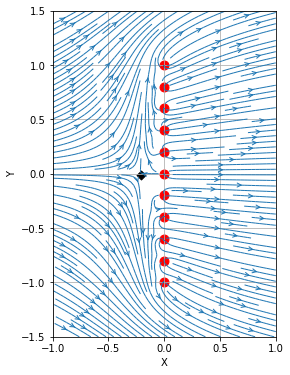

In [13]:
width = 4
height = (y_end - y_start) / (x_end - x_start) * width
py.figure(figsize = (width, height))
py.grid()
py.xlabel('X')
py.ylabel('Y')
py.streamplot(X, Y, u, v,
            density=2, linewidth=1, arrowsize = 1, arrowstyle='->')

#plot points of sources
py.scatter(x_source, y_source,
            color='r', s=80, marker='o')

#compute magnitude and location of stagnation pts
#approximated to lowest velocity magnitude
magnitude = np.sqrt(u**2 + v**2)
j_stagn, i_stagn = np.unravel_index(magnitude.argmin(), magnitude.shape)

#plot stagnation pt
py.scatter(x[i_stagn], y[j_stagn],
          color='k', s=40, marker='D')
py.xlim(x_start, x_end)
py.ylim(y_start, y_end);

In [14]:
from scipy import integrate

In [15]:
print(integrate.quad(lambda x: x**2, 0.0, 1.0))

(0.33333333333333337, 3.700743415417189e-15)


In [20]:
a = 3.0
print(integrate.quad(lambda x, a: a*x**2, 0.0, 1.0, args=a))
b = 2.0
print(integrate.quad(lambda x, a, b: a*b*x**2, 0.0, 1.0, args=(a,b)))

(1.0, 1.1102230246251565e-14)
(2.0, 2.220446049250313e-14)


In [41]:
sigma = 4

y_min, y_max = -1.0,1.0

integrand_u = lambda s, x, y: x / (x**2 + (y - s)**2)
integrand_v = lambda s, x, y: (y - s) / (x**2 + (y - s)**2)

#create dummy funcion to vectorize
def integration(x, y, integrand):
    return integrate.quad(integrand, y_min, y_max, args=(x,y))[0]

vec_integration = np.vectorize(integration)

#compute velocity field of source-sheet
u_sheet = sigma / (2.0 * np.pi) * vec_integration(X, Y, integrand_u)
v_sheet = sigma / (2.0 * np.pi) * vec_integration(X, Y, integrand_v)

#superposition
u = u_freestream + u_sheet
v = v_freestream + v_sheet

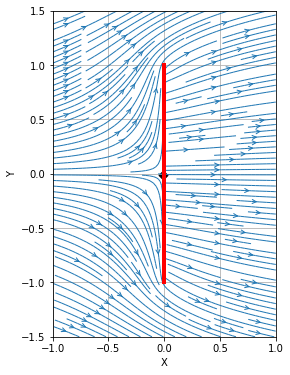

In [42]:
width = 4.0
height = (y_end - y_start) / (x_end - x_start) * width
py.figure(figsize=(width, height))
py.grid()
py.xlabel('X')
py.ylabel('Y')
py.streamplot(X, Y, u, v, 
              density =2, linewidth=1, arrowsize = 1, arrowstyle = '->')

#plotting the source sheet
py.axvline(0.0,
          (y_min - y_start) / (y_end - y_start),
          (y_max - y_start) / (y_end - y_start),
          color='r', linewidth=4)

magnitude = np.sqrt(u**2 + v**2)
j_stagn, i_stagn = np.unravel_index(magnitude.argmin(), magnitude.shape)

py.scatter(x[i_stagn], y[j_stagn],
          color='k', s=40, marker='D')
py.xlim(x_start, x_end)
py.ylim(y_start, y_end);

In [43]:
magnitude.shape

(100, 100)

In [44]:
magnitude.argmin()

4949